In [453]:
import os
import sys
current_directory = os.getcwd()
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mtdnetwork.statistic.utils import savefig
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')


In [454]:
# df = pd.read_csv("experimental_data/results/multiple_mtd_sim.csv")
# df["Name"] = df["Name"].str.capitalize()
#
# # group by the variables and calculate the mean of each column
# grouped = df.groupby(["Name", "mtd_interval", "host_compromise_ratio", "network_size"])[["MEF", "ASR", "time_to_compromise"]].mean()
# ungrouped = grouped.reset_index().reset_index(drop=True)
# # rename the columns
# results_avg = ungrouped.rename(columns={"mtd_interval":"MTD Interval", "host_compromise_ratio": "Host Compromise ratio (compromised hosts / total hosts)","network_size":"Network Size", "MEF": "MTD Execution Frequency", "ASR": "Attack Success Rate", "time_to_compromise": "Mean Time to Compromise (s)"})
# pd.DataFrame(results_avg).to_csv("experimental_data/results/multiple_mtd_sim_avg.csv", index=False)

In [455]:
results_avg = pd.read_csv("experimental_data/results/multiple_mtd_sim_avg.csv")
results_avg["Name"] = results_avg["Name"].str.capitalize()
single_results = pd.read_csv("experimental_data/results/single_mtd_sim_avg.csv")
dap_results = pd.read_csv("experimental_data/results/dap_mtd_sim_avg.csv")
results_avg = results_avg.append(single_results)
results_avg = results_avg.append(dap_results[dap_results['Name'] == 'DAP_OSDiversity_4'])


## No MTD Scenario

Saving figure to file experimental_data/plots/no_mtd_scenario.jpg


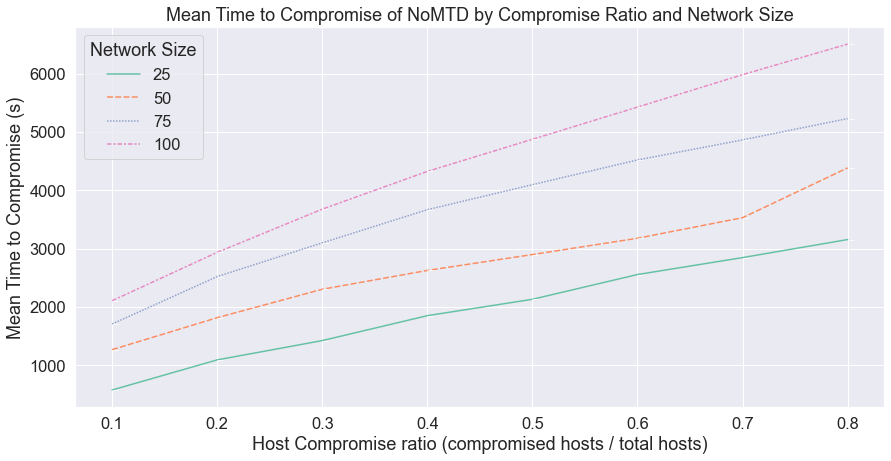

In [456]:
plt.figure(figsize=(14.5, 7))
sns.set(font_scale=1.5)
nomtd_mttc_ratio_interval_results = results_avg[(results_avg['Name']=='NoMTD') & (results_avg['MTD Interval']==100)]
sns.lineplot(nomtd_mttc_ratio_interval_results, x="Host Compromise ratio (compromised hosts / total hosts)", y="Mean Time to Compromise (s)", hue='Network Size', style='Network Size', marker=True, palette='Set2')
plt.legend(loc='upper left', title='Network Size')
plt.title('Mean Time to Compromise of NoMTD by Compromise Ratio and Network Size')
savefig('experimental_data/plots/no_mtd_scenario.jpg')
plt.show()

## DAP MTD

Saving figure to file experimental_data/plots/dap_mttc_ratio_interval_50network.jpg


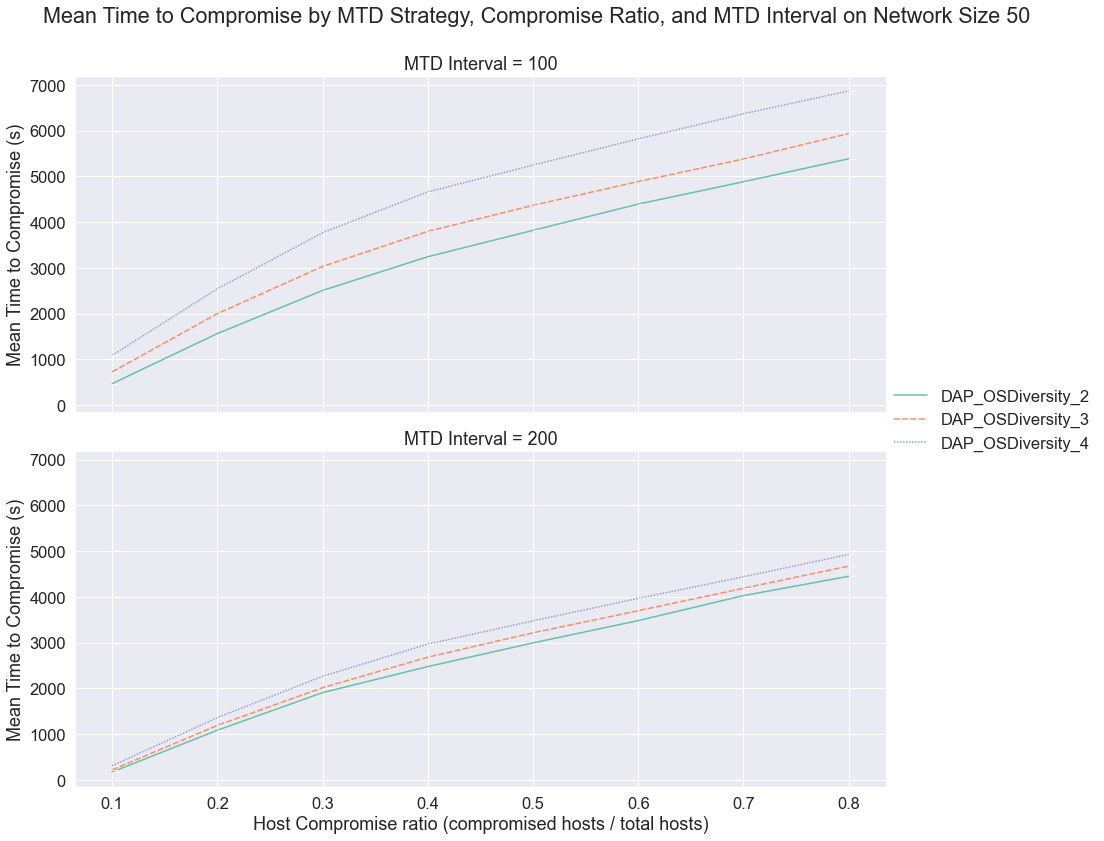

In [457]:
sns.set(font_scale=1.5)
dap_mttc_ratio_interval_results = dap_results[dap_results['Network Size']==50]

g = sns.FacetGrid(dap_mttc_ratio_interval_results, col="MTD Interval",  col_wrap=1, margin_titles=True, despine=False, height=6, aspect= 2.15)
g.map_dataframe(sns.lineplot, x="Host Compromise ratio (compromised hosts / total hosts)", y="Mean Time to Compromise (s)", hue='Name', style='Name', marker=True, palette='Set2')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Time to Compromise by MTD Strategy, Compromise Ratio, and MTD Interval on Network Size 50')
savefig('experimental_data/plots/dap_mttc_ratio_interval_50network.jpg')
plt.show()

## Mean Time to Compromise by MTD Strategy, Compromise Ratio, and MTD Interval on Network Size 50

Saving figure to file experimental_data/plots/mttc_ratio_interval_50network.jpg


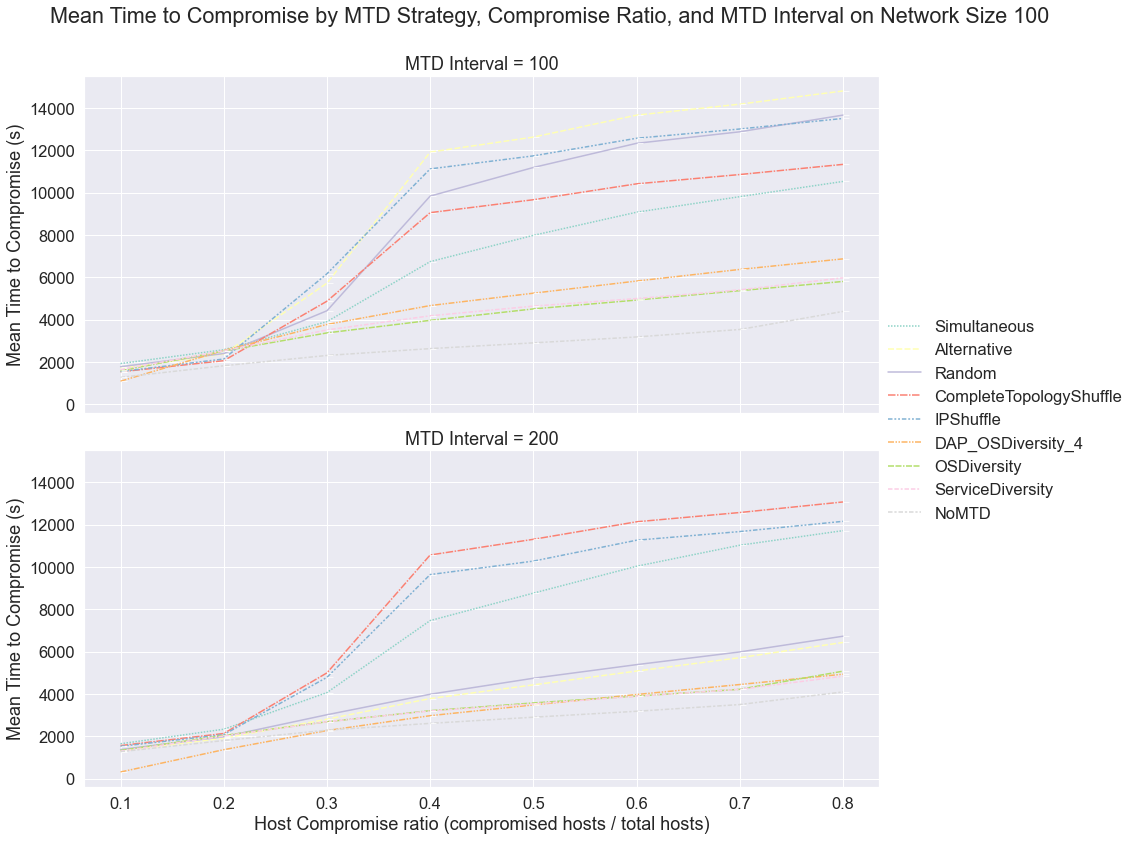

In [458]:
mttc_ratio_interval_results = results_avg[results_avg['Network Size']==50]
# Set the font size of all plot elements
sns.set(font_scale=1.5)
g = sns.FacetGrid(mttc_ratio_interval_results, col="MTD Interval",  col_wrap=1, margin_titles=True, despine=False, height=6, aspect= 2.15)
g.map_dataframe(sns.lineplot, x="Host Compromise ratio (compromised hosts / total hosts)", y="Mean Time to Compromise (s)", hue='Name', style='Name', marker=True, hue_order=["Simultaneous","Alternative", "Random",  "CompleteTopologyShuffle", "IPShuffle", "DAP_OSDiversity_4", "OSDiversity", "ServiceDiversity", "NoMTD"], palette='Set3')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Time to Compromise by MTD Strategy, Compromise Ratio, and MTD Interval on Network Size 100')
savefig('experimental_data/plots/mttc_ratio_interval_50network.jpg')
plt.show()

## Mean Time to Compromise by compromise ratio with Different Network Size on MTD Interval = 200 Scenario

In [459]:
# mttc_ratio_size_results = results_avg[results_avg['MTD Interval']==200]
#
# g = sns.FacetGrid(mttc_ratio_size_results, col="Network Size",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
# g.map_dataframe(sns.lineplot, x="Host Compromise ratio (compromised hosts / total hosts)", y="Mean Time to Compromise (s)", hue='Name', style='Name', marker=True, palette='Set2')
# g.add_legend()
# g.fig.subplots_adjust(top=0.9)
# g.fig.suptitle('Mean Time to Compromise by compromise ratio with Different Network Size on MTD Interval = 200 Scenario')
# savefig('experimental_data/plots/multiple_mttc_ratio_size.jpg')
# plt.show()

## Mean Time to Compromise by Different Network Size with different MTD Interval on Host Compromise ratio = 0.8

Saving figure to file experimental_data/plots/mttc_size_interval.jpg


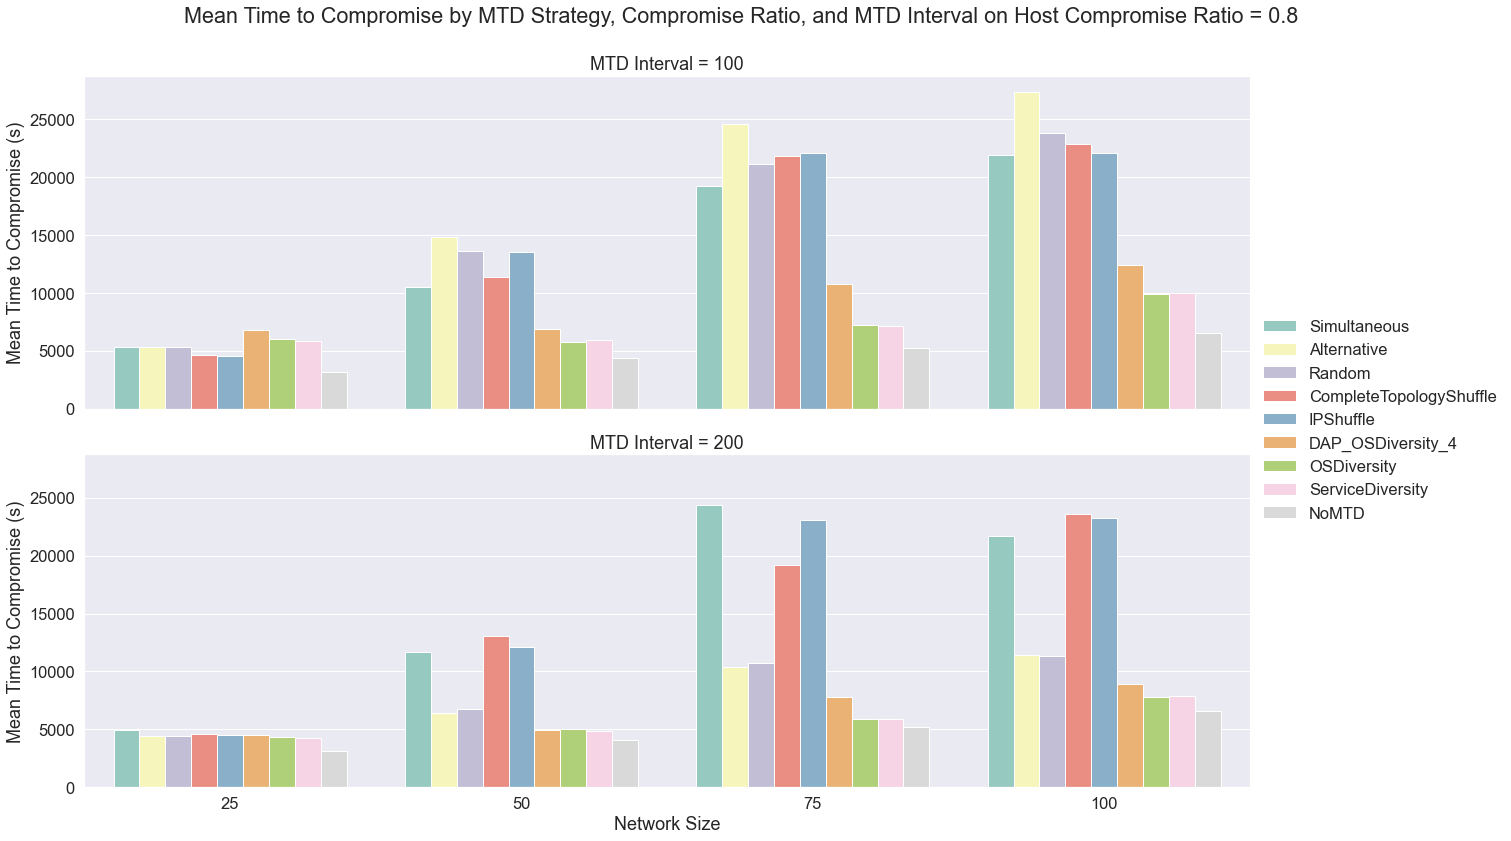

In [460]:
mttc_size_interval_results = results_avg[results_avg['Host Compromise ratio (compromised hosts / total hosts)']==0.8]
sns.set(font_scale=1.5)
g = sns.FacetGrid(mttc_size_interval_results, col="MTD Interval",  col_wrap=1, margin_titles=True, despine=False, height=6, aspect= 3)
g.map_dataframe(sns.barplot, x="Network Size", y="Mean Time to Compromise (s)", hue='Name', hue_order=["Simultaneous","Alternative", "Random",  "CompleteTopologyShuffle", "IPShuffle", "DAP_OSDiversity_4", "OSDiversity", "ServiceDiversity", "NoMTD"], palette='Set3')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Time to Compromise by MTD Strategy, Compromise Ratio, and MTD Interval on Host Compromise Ratio = 0.8')
savefig('experimental_data/plots/mttc_size_interval.jpg')
plt.show()

## Attack Success Rate by Network Size with Different MTD Interval

Saving figure to file experimental_data/plots/asr_interval_size.jpg


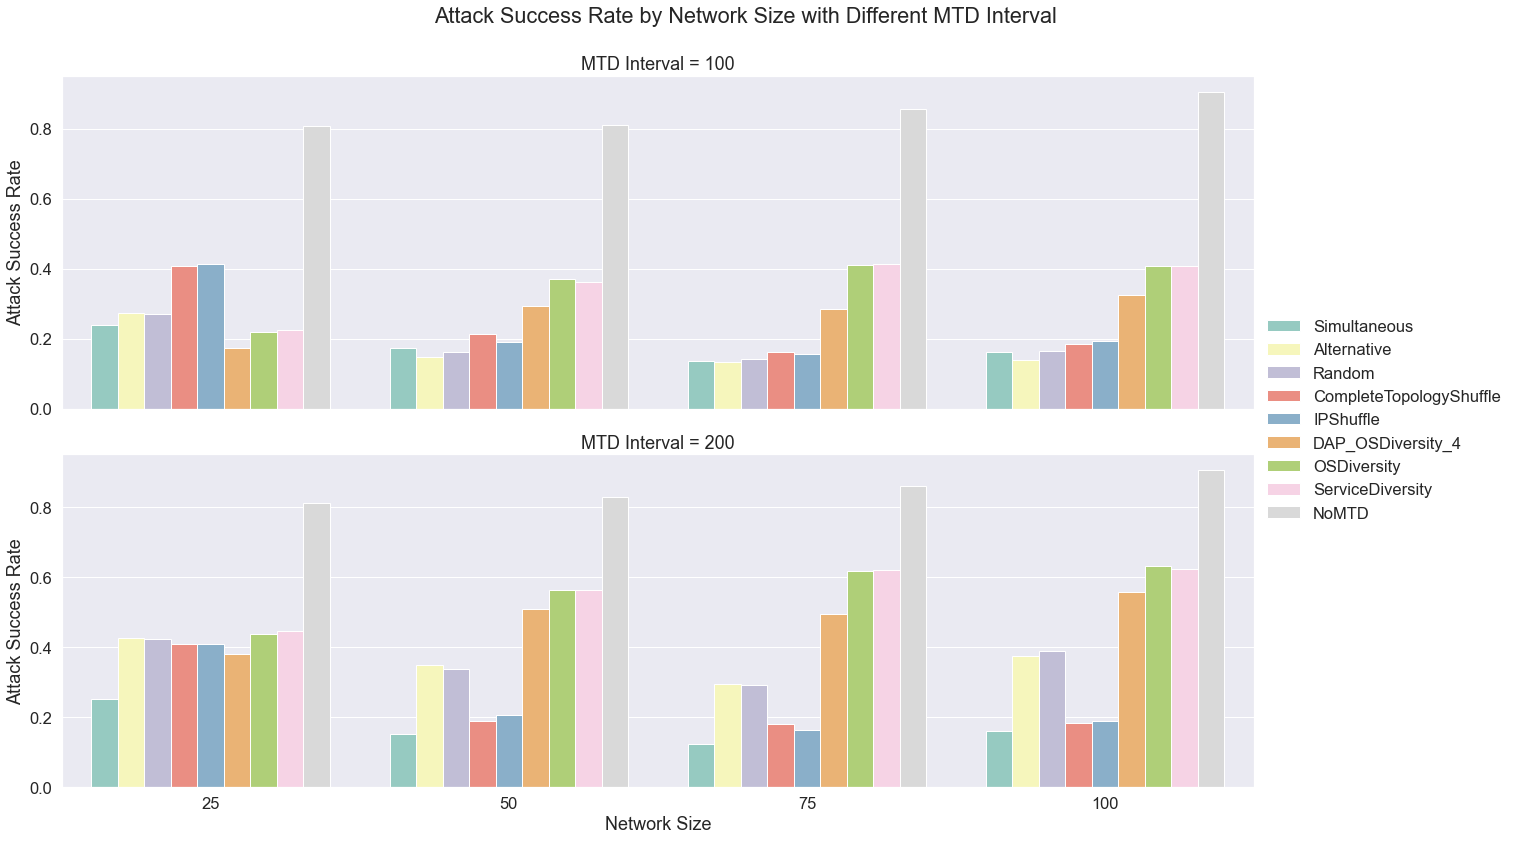

In [461]:
# plt.figure(figsize=(17, 10))
# sns.barplot(data=results_avg, x='MTD Interval', y='Attack Success Rate', hue='Name')
# plt.legend(loc='upper right')
# plt.title('Attack Success Rate at 10000s simulation time with different MTD triggering interval')
# savefig('experimental_data/plots/multiple_mtd_sim_asr.jpg')
# plt.show()

asr_size_interval_results = results_avg[results_avg['Host Compromise ratio (compromised hosts / total hosts)']==0.8]
g = sns.FacetGrid(asr_size_interval_results, col="MTD Interval",  col_wrap=1, margin_titles=True, despine=False, height=6, aspect= 3)
g.map_dataframe(sns.barplot, x="Network Size", y="Attack Success Rate", hue='Name', hue_order=["Simultaneous","Alternative", "Random",  "CompleteTopologyShuffle", "IPShuffle", "DAP_OSDiversity_4", "OSDiversity", "ServiceDiversity", "NoMTD"], palette='Set3')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Attack Success Rate by Network Size with Different MTD Interval')
savefig('experimental_data/plots/asr_interval_size.jpg')
plt.show()

Saving figure to file experimental_data/plots/mttc_size_heatmap.jpg


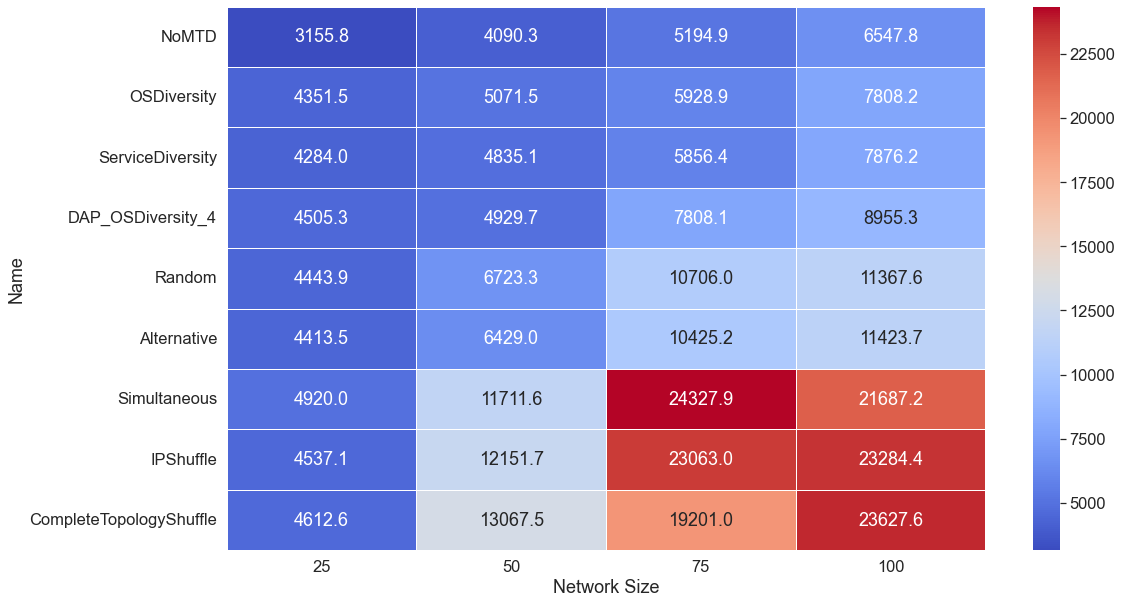

In [462]:
plt.figure(figsize=(17, 10))
heat_map_results = results_avg[(results_avg['Host Compromise ratio (compromised hosts / total hosts)']==0.8)  & (results_avg['MTD Interval']==200)]
heat_map_results = heat_map_results.pivot_table(index='Name', columns='Network Size', values='Mean Time to Compromise (s)')
heat_map_results = heat_map_results.sort_values(100)
sns.heatmap(heat_map_results, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.5)
savefig('experimental_data/plots/mttc_size_heatmap.jpg')
# Add legend to the jointplot
plt.show()